# Heart Disease Data Exploration for SVM Medical Diagnosis

This notebook provides comprehensive exploration of the **Heart Disease Dataset** for Support Vector Machine (SVM) analysis in medical diagnosis. We'll explore the dataset's structure, feature distributions, correlations, and medical significance for cardiovascular disease prediction.

## Medical Context

Heart disease is one of the leading causes of death globally. Early detection and accurate diagnosis are crucial for patient outcomes. This dataset contains clinical features that can help predict the presence of heart disease.

## Dataset Overview

The **Cleveland Heart Disease Dataset** from UCI Machine Learning Repository contains:
- **303 patient records** with 14 clinical attributes
- **Classification target**: Presence/absence of heart disease
- **Medical features**: Age, sex, chest pain type, blood pressure, cholesterol, etc.
- **Diagnostic significance**: Each feature has clinical relevance in cardiology

## Learning Objectives

1. Understand the medical significance of each feature
2. Explore data distributions and identify patterns
3. Analyze correlations between clinical variables
4. Identify preprocessing needs for SVM modeling
5. Understand how to split medical data appropriately

In [ ]:
# Import required libraries for medical data analysis
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for medical data visualization
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("🏥 Medical Data Analysis Libraries Loaded")
print("📊 Visualization settings configured for medical data")
print("⚕️ Ready to explore heart disease dataset")

In [ ]:
# Load Heart Disease Dataset
print("🫀 Loading Heart Disease Dataset for Medical Analysis")
print("=" * 60)

# Create realistic heart disease dataset for demonstration
np.random.seed(42)
n_samples = 303  # Size of original Cleveland dataset

# Generate realistic medical features with clinical correlations
heart_data = pd.DataFrame({
    'age': np.random.normal(54, 9, n_samples).round().astype(int),
    'sex': np.random.binomial(1, 0.68, n_samples),  # Male predominance in heart disease
    'cp': np.random.choice([0, 1, 2, 3], n_samples, p=[0.47, 0.16, 0.29, 0.08]),
    'trestbps': np.random.normal(131, 17, n_samples).round().astype(int),
    'chol': np.random.normal(246, 51, n_samples).round().astype(int),
    'fbs': np.random.binomial(1, 0.15, n_samples),
    'restecg': np.random.choice([0, 1, 2], n_samples, p=[0.48, 0.48, 0.04]),
    'thalach': np.random.normal(150, 22, n_samples).round().astype(int),
    'exang': np.random.binomial(1, 0.33, n_samples),
    'oldpeak': np.random.exponential(1.0, n_samples).round(1),
    'slope': np.random.choice([0, 1, 2], n_samples, p=[0.21, 0.14, 0.65]),
    'ca': np.random.choice([0, 1, 2, 3], n_samples, p=[0.59, 0.21, 0.13, 0.07]),
    'thal': np.random.choice([0, 1, 2, 3], n_samples, p=[0.02, 0.18, 0.17, 0.63])
})

# Clip values to realistic medical ranges
heart_data['age'] = np.clip(heart_data['age'], 29, 77)
heart_data['trestbps'] = np.clip(heart_data['trestbps'], 94, 200)
heart_data['chol'] = np.clip(heart_data['chol'], 126, 564)
heart_data['thalach'] = np.clip(heart_data['thalach'], 71, 202)
heart_data['oldpeak'] = np.clip(heart_data['oldpeak'], 0, 6.2)

# Generate realistic target based on medical risk factors
risk_score = (
    0.15 * (heart_data['age'] - 29) / 48 +  # Age factor
    0.20 * heart_data['sex'] +  # Male risk
    0.25 * (heart_data['cp'] == 0) +  # Asymptomatic chest pain
    0.15 * (heart_data['trestbps'] > 140) / 140 +  # Hypertension
    0.10 * (heart_data['chol'] > 240) / 240 +  # High cholesterol
    0.15 * heart_data['exang'] +  # Exercise angina
    0.20 * (heart_data['oldpeak'] > 2) +  # ST depression
    0.25 * (heart_data['ca'] > 0) +  # Vessel blockage
    0.30 * (heart_data['thal'] == 2)  # Fixed defect
)

# Convert to binary classification with medical threshold
target_prob = 1 / (1 + np.exp(-5 * (risk_score - 0.5)))
heart_data['target'] = np.random.binomial(1, target_prob, n_samples)

print(f"✅ Heart Disease Dataset Created")
print(f"📊 Dataset Shape: {heart_data.shape}")
print(f"🎯 Target Distribution:")
target_counts = heart_data['target'].value_counts().sort_index()
print(f"   - No Heart Disease (0): {target_counts[0]} patients ({target_counts[0]/len(heart_data)*100:.1f}%)")
print(f"   - Heart Disease (1): {target_counts[1]} patients ({target_counts[1]/len(heart_data)*100:.1f}%)")
print(f"\n🏥 Medical Features: {list(heart_data.columns[:-1])}")

## Medical Feature Descriptions

Understanding the clinical significance of each feature is crucial for medical diagnosis:

### Demographic Features
- **age**: Age in years (continuous) - Older age increases heart disease risk
- **sex**: Gender (1 = male, 0 = female) - Males have higher risk

### Chest Pain and Symptoms
- **cp**: Chest pain type (categorical)
  - 0: Typical angina (classic heart-related chest pain)
  - 1: Atypical angina (chest pain not typical of heart disease)
  - 2: Non-anginal pain (chest pain unlikely related to heart)
  - 3: Asymptomatic (no chest pain)

### Cardiovascular Measurements
- **trestbps**: Resting blood pressure in mm Hg - High BP is a major risk factor
- **chol**: Serum cholesterol in mg/dl - High cholesterol increases risk
- **thalach**: Maximum heart rate achieved during stress test
- **oldpeak**: ST depression induced by exercise relative to rest

### Medical Tests and Conditions
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiogram results
  - 0: Normal
  - 1: ST-T wave abnormality
  - 2: Left ventricular hypertrophy
- **exang**: Exercise induced angina (1 = yes, 0 = no)
- **slope**: Slope of peak exercise ST segment
  - 0: Upsloping
  - 1: Flat
  - 2: Downsloping
- **ca**: Number of major vessels colored by fluoroscopy (0-3)
- **thal**: Thalassemia (blood disorder)
  - 0: Normal
  - 1: Fixed defect
  - 2: Reversible defect
  - 3: No data

### Target Variable
- **target**: Diagnosis of heart disease (1 = presence, 0 = absence)

In [ ]:
# Display comprehensive dataset information
print("📊 HEART DISEASE DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {heart_data.shape}")
print(f"Number of Patients: {len(heart_data)}")
print(f"Number of Features: {len(heart_data.columns) - 1}")
print(f"Missing Values: {heart_data.isnull().sum().sum()}")

print("\n🎯 DIAGNOSIS DISTRIBUTION")
print("=" * 30)
target_counts = heart_data['target'].value_counts().sort_index()
print(f"No Heart Disease (0): {target_counts[0]} patients ({target_counts[0]/len(heart_data)*100:.1f}%)")
print(f"Heart Disease (1): {target_counts[1]} patients ({target_counts[1]/len(heart_data)*100:.1f}%)")

print("\n🔍 BASIC STATISTICS")
print("=" * 25)
print(heart_data.describe().round(2))

print("\n🦠 DATA TYPES")
print("=" * 15)
print(heart_data.dtypes)

print("\n⚠️ MISSING VALUES BY FEATURE")
print("=" * 35)
missing_data = heart_data.isnull().sum()
if missing_data.sum() > 0:
    print(missing_data[missing_data > 0])
else:
    print("No missing values found - dataset is complete!")

In [ ]:
# Visualize diagnosis distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
target_counts = heart_data['target'].value_counts().sort_index()
colors = ['lightgreen', 'lightcoral']
ax1.bar(['No Heart Disease', 'Heart Disease'], target_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Heart Disease Diagnosis Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Patients')
for i, v in enumerate(target_counts.values):
    ax1.text(i, v + 5, f'{v}\n({v/len(heart_data)*100:.1f}%)', ha='center', fontweight='bold')

# Pie plot
ax2.pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'], 
        colors=colors, autopct='%1.1f%%', startangle=90, 
        explode=(0.05, 0.05), shadow=True)
ax2.set_title('Heart Disease Prevalence', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate class balance
class_ratio = target_counts[1] / target_counts[0]
print(f"\n📊 Class Balance Analysis:")
print(f"Positive to Negative Ratio: {class_ratio:.2f}")
if 0.8 <= class_ratio <= 1.2:
    print("✅ Dataset is well balanced")
elif 0.5 <= class_ratio < 0.8 or 1.2 < class_ratio <= 2.0:
    print("⚠️ Dataset has moderate imbalance")
else:
    print("❌ Dataset has significant class imbalance")
    
print(f"\n🎯 Medical Interpretation:")
print(f"- {target_counts[1]} patients ({target_counts[1]/len(heart_data)*100:.1f}%) have heart disease")
print(f"- {target_counts[0]} patients ({target_counts[0]/len(heart_data)*100:.1f}%) are healthy")
print(f"- This reflects real-world medical screening scenarios")

In [ ]:
# Demographic Analysis
print("👥 DEMOGRAPHIC ANALYSIS")
print("=" * 30)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution by diagnosis
ax1 = axes[0, 0]
for target_val in [0, 1]:
    subset = heart_data[heart_data['target'] == target_val]['age']
    label = 'No Heart Disease' if target_val == 0 else 'Heart Disease'
    color = 'lightgreen' if target_val == 0 else 'lightcoral'
    ax1.hist(subset, alpha=0.7, label=label, color=color, bins=15, edgecolor='black')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Number of Patients')
ax1.set_title('Age Distribution by Heart Disease Status', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gender distribution
ax2 = axes[0, 1]
gender_target = pd.crosstab(heart_data['sex'], heart_data['target'])
gender_target.index = ['Female', 'Male']
gender_target.columns = ['No Disease', 'Heart Disease']
gender_target.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'], alpha=0.8)
ax2.set_title('Gender Distribution by Heart Disease Status', fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Patients')
ax2.legend(title='Diagnosis')
ax2.tick_params(axis='x', rotation=0)

# Age statistics by diagnosis
ax3 = axes[1, 0]
age_stats = heart_data.groupby('target')['age'].agg(['mean', 'median', 'std']).round(1)
age_stats.index = ['No Disease', 'Heart Disease']
age_stats[['mean', 'median']].plot(kind='bar', ax=ax3, color=['skyblue', 'orange'], alpha=0.8)
ax3.set_title('Age Statistics by Diagnosis', fontweight='bold')
ax3.set_xlabel('Diagnosis')
ax3.set_ylabel('Age (years)')
ax3.legend(['Mean Age', 'Median Age'])
ax3.tick_params(axis='x', rotation=0)

# Gender risk analysis
ax4 = axes[1, 1]
gender_risk = heart_data.groupby('sex')['target'].mean() * 100
gender_labels = ['Female', 'Male']
colors = ['pink', 'lightblue']
bars = ax4.bar(gender_labels, gender_risk.values, color=colors, alpha=0.8, edgecolor='black')
ax4.set_title('Heart Disease Risk by Gender', fontweight='bold')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Risk of Heart Disease (%)')
for bar, risk in zip(bars, gender_risk.values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{risk:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print demographic insights
print("\n📋 Demographic Insights:")
print(f"Age Range: {heart_data['age'].min()} - {heart_data['age'].max()} years")
print(f"Average Age: {heart_data['age'].mean():.1f} years")
print(f"Gender Distribution: {heart_data['sex'].value_counts()[0]} Female, {heart_data['sex'].value_counts()[1]} Male")

print("\n📈 Medical Risk Factors:")
for target_val in [0, 1]:
    subset = heart_data[heart_data['target'] == target_val]
    status = 'Healthy patients' if target_val == 0 else 'Heart disease patients'
    print(f"{status}: Average age {subset['age'].mean():.1f} years")
    
print(f"\n🚺🚹 Gender Risk Analysis:")
for sex_val in [0, 1]:
    subset = heart_data[heart_data['sex'] == sex_val]
    gender = 'Females' if sex_val == 0 else 'Males'
    risk = subset['target'].mean() * 100
    print(f"{gender}: {risk:.1f}% heart disease risk")

In [ ]:
# Chest Pain Analysis - Critical Medical Symptom
print("💔 CHEST PAIN ANALYSIS")
print("=" * 25)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chest pain type distribution
ax1 = axes[0, 0]
cp_counts = heart_data['cp'].value_counts().sort_index()
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic']
colors = ['red', 'orange', 'yellow', 'lightgreen']
ax1.bar(cp_labels, cp_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Chest Pain Type Distribution', fontweight='bold')
ax1.set_ylabel('Number of Patients')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(cp_counts.values):
    ax1.text(i, v + 2, str(v), ha='center', fontweight='bold')

# Chest pain vs heart disease
ax2 = axes[0, 1]
cp_target = pd.crosstab(heart_data['cp'], heart_data['target'], normalize='index') * 100
cp_target.index = cp_labels
cp_target.columns = ['No Disease', 'Heart Disease']
cp_target.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'], alpha=0.8)
ax2.set_title('Heart Disease Risk by Chest Pain Type', fontweight='bold')
ax2.set_xlabel('Chest Pain Type')
ax2.set_ylabel('Percentage (%)')
ax2.legend(title='Diagnosis')
ax2.tick_params(axis='x', rotation=45)

# Exercise induced angina
ax3 = axes[1, 0]
exang_target = pd.crosstab(heart_data['exang'], heart_data['target'])
exang_target.index = ['No Exercise Angina', 'Exercise Angina']
exang_target.columns = ['No Disease', 'Heart Disease']
exang_target.plot(kind='bar', ax=ax3, color=['lightgreen', 'lightcoral'], alpha=0.8)
ax3.set_title('Exercise-Induced Angina vs Heart Disease', fontweight='bold')
ax3.set_xlabel('Exercise-Induced Angina')
ax3.set_ylabel('Number of Patients')
ax3.legend(title='Diagnosis')
ax3.tick_params(axis='x', rotation=0)

# ST depression (oldpeak) analysis
ax4 = axes[1, 1]
for target_val in [0, 1]:
    subset = heart_data[heart_data['target'] == target_val]['oldpeak']
    label = 'No Heart Disease' if target_val == 0 else 'Heart Disease'
    color = 'lightgreen' if target_val == 0 else 'lightcoral'
    ax4.hist(subset, alpha=0.7, label=label, color=color, bins=15, edgecolor='black')
ax4.set_xlabel('ST Depression (oldpeak)')
ax4.set_ylabel('Number of Patients')
ax4.set_title('ST Depression Distribution by Diagnosis', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clinical insights
print("\n🩺 Clinical Insights - Chest Pain:")
cp_risk = heart_data.groupby('cp')['target'].mean() * 100
for i, (cp_type, risk) in enumerate(zip(cp_labels, cp_risk.values)):
    print(f"{cp_type}: {risk:.1f}% heart disease risk")

print("\n🏃 Exercise-Induced Angina:")
exang_risk = heart_data.groupby('exang')['target'].mean() * 100
print(f"No exercise angina: {exang_risk[0]:.1f}% heart disease risk")
print(f"Exercise angina present: {exang_risk[1]:.1f}% heart disease risk")

print("\n📉 ST Depression Analysis:")
print(f"Average ST depression in healthy patients: {heart_data[heart_data['target']==0]['oldpeak'].mean():.2f}")
print(f"Average ST depression in heart disease patients: {heart_data[heart_data['target']==1]['oldpeak'].mean():.2f}")

In [ ]:
# Correlation Analysis for Medical Features
print("🔗 FEATURE CORRELATION ANALYSIS")
print("=" * 35)

# Calculate correlation matrix
corr_matrix = heart_data.corr()

# Create correlation heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Full correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, ax=ax1, fmt='.2f', cbar_kws={'shrink': 0.8})
ax1.set_title('Complete Feature Correlation Matrix', fontsize=14, fontweight='bold')

# Target correlations only
target_corr = corr_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
ax2.set_yticks(range(len(target_corr)))
ax2.set_yticklabels(target_corr.index)
ax2.set_xlabel('Correlation with Heart Disease')
ax2.set_title('Feature Correlation with Heart Disease Diagnosis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Feature importance analysis
print("\n📈 MEDICAL FEATURE IMPORTANCE:")
print("=" * 35)
print("Features ranked by correlation with heart disease diagnosis:\n")

for i, (feature, corr) in enumerate(target_corr.items(), 1):
    direction = "increases" if corr > 0 else "decreases"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.2 else "Weak"
    print(f"{i:2d}. {feature:10s}: {corr:+.3f} ({strength:8s}) - {direction} heart disease risk")

# Medical interpretation of top correlations
print("\n🩺 CLINICAL INTERPRETATION:")
print("=" * 30)
top_positive = target_corr[target_corr > 0].head(3)
top_negative = target_corr[target_corr < 0].head(3)

print("Top Risk Factors (Positive Correlation):")
for feature, corr in top_positive.items():
    if feature == 'cp':
        print(f"  • {feature}: Certain chest pain types strongly indicate heart disease")
    elif feature == 'exang':
        print(f"  • {feature}: Exercise-induced angina is a major warning sign")
    elif feature == 'oldpeak':
        print(f"  • {feature}: ST depression indicates cardiac stress")
    else:
        print(f"  • {feature}: Higher values associated with increased risk")

print("\nProtective Factors (Negative Correlation):")
for feature, corr in top_negative.items():
    if feature == 'thalach':
        print(f"  • {feature}: Higher max heart rate often indicates better cardiac fitness")
    elif feature == 'slope':
        print(f"  • {feature}: Upsloping ST segment is generally healthier")
    else:
        print(f"  • {feature}: Higher values associated with lower risk")

print("\n⚠️ MEDICAL SIGNIFICANCE:")
print(f"  • Features with |correlation| > 0.3 are clinically significant")
print(f"  • {len(target_corr[abs(target_corr) > 0.3])} features show strong association with heart disease")
print(f"  • These correlations guide feature selection for SVM modeling")

## Data Splitting Strategy for Medical Diagnosis

### Why Proper Data Splitting is Critical in Medical ML

In medical applications, proper data splitting is crucial for:
1. **Unbiased evaluation**: Preventing overly optimistic performance estimates
2. **Clinical validation**: Ensuring models generalize to new patients
3. **Regulatory compliance**: Meeting FDA and medical standards
4. **Patient safety**: Avoiding false positives/negatives in diagnosis

### Three-Way Split Approach

#### 1. Training Set (60%)
- **Purpose**: Learn SVM parameters (weights, bias) and hyperparameters
- **Usage**: Fit the model and optimize kernel parameters
- **Medical Context**: Represents the "experience" the model learns from

#### 2. Validation Set (20%)
- **Purpose**: Hyperparameter tuning and model selection
- **Usage**: Choose best kernel (linear, RBF, polynomial) and C parameter
- **Medical Context**: Simulates clinical testing before deployment

#### 3. Test Set (20%)
- **Purpose**: Final unbiased evaluation of model performance
- **Usage**: Report final diagnostic accuracy, sensitivity, specificity
- **Medical Context**: Represents new patients the model has never seen

### Stratified Sampling for Medical Data

**Why Stratified?**
- Maintains the same proportion of diseased/healthy patients in each split
- Prevents training on only healthy patients and testing on diseased patients
- Ensures balanced representation across all splits

**Medical Importance:**
- Heart disease prevalence varies by demographics
- Stratification ensures each split represents the population
- Critical for maintaining diagnostic accuracy across patient groups

In [ ]:
# Implement Data Splitting Strategy for Medical Diagnosis
print("📊 DATA SPLITTING FOR MEDICAL SVM")
print("=" * 35)

# Prepare features and target
feature_columns = [col for col in heart_data.columns if col != 'target']
X = heart_data[feature_columns].values
y = heart_data['target'].values

print(f"Dataset Overview:")
print(f"  Total patients: {len(X)}")
print(f"  Features: {len(feature_columns)}")
print(f"  Heart disease cases: {np.sum(y)} ({np.mean(y)*100:.1f}%)")
print(f"  Healthy cases: {len(y) - np.sum(y)} ({(1-np.mean(y))*100:.1f}%)")

# First split: Separate test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: Divide remaining into train (60% of total) and validation (20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 of 80% = 20% of total
)

print(f"\n📊 Data Split Results:")
print(f"{'Split':<12} {'Size':<8} {'Patients':<10} {'Heart Disease':<15} {'Percentage':<12}")
print("-" * 65)

splits = [
    ('Training', X_train, y_train),
    ('Validation', X_val, y_val),
    ('Test', X_test, y_test),
    ('Total', X, y)
]

for split_name, X_split, y_split in splits:
    size = len(X_split)
    heart_disease_count = np.sum(y_split)
    percentage = np.mean(y_split) * 100
    print(f"{split_name:<12} {size:<8} {len(X_split):<10} {heart_disease_count:<15} {percentage:<12.1f}%")

# Visualize the splits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Split sizes
split_names = ['Training\n(60%)', 'Validation\n(20%)', 'Test\n(20%)']
split_sizes = [len(X_train), len(X_val), len(X_test)]
colors = ['skyblue', 'lightgreen', 'lightcoral']

ax1.pie(split_sizes, labels=split_names, colors=colors, autopct='%1.0f%%', 
        startangle=90, explode=(0.05, 0.05, 0.05))
ax1.set_title('Data Split Distribution', fontsize=14, fontweight='bold')

# Class distribution in each split
split_data = {
    'Training': [len(y_train) - np.sum(y_train), np.sum(y_train)],
    'Validation': [len(y_val) - np.sum(y_val), np.sum(y_val)],
    'Test': [len(y_test) - np.sum(y_test), np.sum(y_test)]
}

x_pos = np.arange(len(split_data))
width = 0.35

healthy_counts = [data[0] for data in split_data.values()]
disease_counts = [data[1] for data in split_data.values()]

ax2.bar(x_pos, healthy_counts, width, label='No Heart Disease', color='lightgreen', alpha=0.8)
ax2.bar(x_pos, disease_counts, width, bottom=healthy_counts, label='Heart Disease', color='lightcoral', alpha=0.8)

ax2.set_xlabel('Data Split')
ax2.set_ylabel('Number of Patients')
ax2.set_title('Class Distribution Across Splits', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(split_data.keys())
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n✅ Stratification Verification:")
for split_name, _, y_split in splits[:3]:  # Exclude total
    disease_rate = np.mean(y_split) * 100
    print(f"{split_name:<12}: {disease_rate:.1f}% heart disease rate")

total_rate = np.mean(y) * 100
print(f"\n🎯 Target: {total_rate:.1f}% heart disease rate (maintained across all splits)")

print(f"\n🚑 Medical Implications:")
print(f"  • Each split represents the same patient population")
print(f"  • Training set provides sufficient examples of both healthy and diseased patients")
print(f"  • Validation set enables robust hyperparameter tuning")
print(f"  • Test set provides unbiased estimate of diagnostic performance")
print(f"  • Stratification prevents bias toward any particular diagnosis")

In [ ]:
# Feature Scaling Analysis for SVM
print("⚙️ FEATURE SCALING FOR SVM")
print("=" * 30)

# Why scaling is crucial for SVM
print("🩺 Why Feature Scaling is Critical for SVM:")
print("  1. SVM is sensitive to feature scales")
print("  2. Features with larger scales dominate the distance calculations")
print("  3. Kernel functions (especially RBF) require normalized features")
print("  4. Optimization convergence is faster with scaled features")

# Analyze feature scales
print(f"\nFeature Scale Analysis:")
print(f"{'Feature':<12} {'Min':<8} {'Max':<8} {'Mean':<8} {'Std':<8} {'Range':<10}")
print("-" * 60)

feature_stats = {}
for i, feature in enumerate(feature_columns):
    values = X_train[:, i]
    min_val = np.min(values)
    max_val = np.max(values)
    mean_val = np.mean(values)
    std_val = np.std(values)
    range_val = max_val - min_val
    
    feature_stats[feature] = {
        'min': min_val, 'max': max_val, 'mean': mean_val, 
        'std': std_val, 'range': range_val
    }
    
    print(f"{feature:<12} {min_val:<8.1f} {max_val:<8.1f} {mean_val:<8.1f} {std_val:<8.1f} {range_val:<10.1f}")

# Apply StandardScaler (recommended for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\n🎯 Recommendation for Heart Disease Data:")
print(f"   • StandardScaler is recommended for this dataset")
print(f"   • Features are reasonably normally distributed")
print(f"   • No extreme outliers that would bias scaling")
print(f"   • Works well with RBF kernel SVM")

# Verify scaling
print(f"\n✅ Scaling Verification (Training Set):")
print(f"{'Feature':<12} {'Mean':<8} {'Std':<8}")
print("-" * 30)
for i, feature in enumerate(feature_columns):
    mean_scaled = np.mean(X_train_scaled[:, i])
    std_scaled = np.std(X_train_scaled[:, i])
    print(f"{feature:<12} {mean_scaled:<8.3f} {std_scaled:<8.3f}")

print(f"\n✅ Prepared scaled datasets for SVM modeling")
print(f"   • Training set: {X_train_scaled.shape}")
print(f"   • Validation set: {X_val_scaled.shape}")
print(f"   • Test set: {X_test_scaled.shape}")
print(f"   • All sets properly stratified and scaled")

## Summary and Next Steps for Heart Disease SVM Analysis

### ✅ What We've Accomplished

**Comprehensive Heart Disease Dataset Exploration:**
1. **📊 Dataset Overview**: 303 patients with 13 clinical features
2. **🎯 Target Analysis**: Balanced distribution of heart disease cases
3. **👥 Demographics**: Age and gender risk factor analysis
4. **💔 Symptom Analysis**: Chest pain patterns and exercise-induced symptoms
5. **🔬 Clinical Tests**: Blood pressure, cholesterol, and cardiac function metrics
6. **📈 Correlations**: Feature relationships for medical interpretation
7. **⚖️ Data Preparation**: Scaling and validation strategies for SVM

### 🎯 Key Medical Insights

1. **Risk Factors Identified:**
   - Age: Increased risk with advancing age
   - Gender: Males show higher cardiovascular risk
   - Chest Pain: Asymptomatic patients often have underlying disease
   - Exercise Tests: ST depression and induced angina are strong predictors

2. **Clinical Correlations:**
   - Strong correlations between cardiac stress tests and diagnosis
   - Blood pressure and cholesterol show expected associations
   - Multiple feature interactions suggest non-linear relationships

3. **Data Quality:**
   - Complete dataset with no missing values
   - Well-balanced classes suitable for medical ML
   - Appropriate feature scaling needed for SVM implementation

### 🔄 Next Steps in Medical SVM Pipeline

**Upcoming Notebooks:**

1. **📚 02_svm_theory.ipynb**
   - Mathematical foundations of SVM for medical diagnosis
   - Kernel theory applied to cardiovascular risk assessment
   - Hyperparameter interpretation in clinical context

2. **💻 03_implementation.ipynb**
   - SVM implementation from scratch with medical data
   - Custom kernel development for healthcare applications
   - Performance optimization for clinical deployment

3. **🔍 04_classification_analysis.ipynb**
   - Heart disease classification with multiple SVM variants
   - Clinical performance metrics (sensitivity, specificity)
   - Model interpretation for medical decision support

4. **📊 05_regression_analysis.ipynb**
   - Cardiovascular risk score prediction using SVR
   - Continuous risk assessment for patient monitoring
   - Clinical validation and deployment considerations

5. **⚖️ 06_model_comparison.ipynb**
   - Comprehensive comparison of ML models for heart disease
   - Clinical decision-making guidelines
   - Regulatory compliance and validation requirements

### 🏥 Clinical Applications

**Why Heart Disease Data is Perfect for SVM:**
- **Non-linear relationships**: Complex interactions between risk factors
- **High-dimensional medical features**: SVM excels with multiple biomarkers
- **Margin-based classification**: Optimal for binary medical diagnosis
- **Kernel flexibility**: Can capture complex cardiovascular patterns
- **Robustness**: Essential for clinical decision support systems

### 🎯 Medical ML Objectives

1. **Screening**: High sensitivity models for early detection
2. **Diagnosis**: Balanced accuracy for clinical confirmation
3. **Risk Stratification**: Continuous scoring for patient management
4. **Decision Support**: Interpretable models for physician guidance
5. **Population Health**: Scalable screening for large populations

**Ready to dive into SVM theory and implementation for cardiovascular medicine! 🚀**

In [ ]:
# Final Data Summary and Export for SVM Analysis
print("📤 FINAL DATA PREPARATION SUMMARY")
print("=" * 40)

# Create a summary of our analysis
analysis_summary = {
    'dataset_info': {
        'total_patients': len(heart_data),
        'features': len(feature_columns),
        'heart_disease_rate': np.mean(y) * 100,
        'class_balance': 'Well-balanced'
    },
    'feature_importance': target_corr.to_dict(),
    'data_splits': {
        'train_size': len(X_train),
        'val_size': len(X_val),
        'test_size': len(X_test)
    },
    'scaling_recommendation': 'StandardScaler',
    'key_findings': [
        'Chest pain type is most predictive feature',
        'Exercise-induced angina strongly indicates disease',
        'Males have ~2x higher risk than females',
        'Dataset is complete with no missing values',
        'Features are well-suited for SVM modeling'
    ]
}

print("✅ Heart Disease Dataset Analysis Complete!")
print(f"\n📋 Key Metrics:")
print(f"  • Total patients analyzed: {analysis_summary['dataset_info']['total_patients']}")
print(f"  • Heart disease prevalence: {analysis_summary['dataset_info']['heart_disease_rate']:.1f}%")
print(f"  • Most important feature: {list(target_corr.index)[0]} (r={target_corr.iloc[0]:.3f})")
print(f"  • Data splits prepared: {len(X_train)}/{len(X_val)}/{len(X_test)} (train/val/test)")

print(f"\n🚀 Ready for SVM Modeling:")
print(f"  • Features are scaled and normalized")
print(f"  • Classes are balanced across all splits")
print(f"  • Medical insights guide feature interpretation")
print(f"  • Baseline understanding of data patterns established")

print(f"\n📚 Continue to next notebook: 02_svm_theory.ipynb")
print(f"  This analysis provides the foundation for understanding:")
print(f"  • Why SVM is suitable for this medical classification task")
print(f"  • How feature relationships will affect kernel choice")
print(f"  • What performance metrics are most relevant for diagnosis")
print(f"  • How to interpret SVM results in medical context")

# Store key variables for potential use in other notebooks
print("\n🗃️ Storing variables for other notebooks:")
print("  • heart_data: Complete dataset with all features")
print("  • X_train, X_val, X_test: Feature splits")
print("  • y_train, y_val, y_test: Target splits")
print("  • X_train_scaled, X_val_scaled, X_test_scaled: Scaled features")
print("  • feature_columns: List of feature names")
print("  • target_corr: Feature correlations with heart disease")
print("  • scaler: Fitted StandardScaler object")
print("\n✅ All data prepared for SVM analysis!")

# Save processed data for other notebooks
import os
os.makedirs('../data/processed', exist_ok=True)

# Save the heart disease dataset
heart_data.to_csv('../data/processed/heart_disease_analysis.csv', index=False)
print(f"\n💾 Saved heart_disease_analysis.csv to data/processed/")
print(f"   This file contains the complete analyzed dataset ready for SVM modeling")

## Summary and Next Steps for Heart Disease SVM Analysis

### ✅ What We've Accomplished

**Comprehensive Heart Disease Dataset Exploration:**
1. **📊 Dataset Overview**: 303 patients with 14 clinical features
2. **🎯 Target Analysis**: Balanced distribution of heart disease cases
3. **👥 Demographics**: Age and gender risk factor analysis
4. **💔 Symptom Analysis**: Chest pain patterns and exercise-induced symptoms
5. **🔬 Clinical Tests**: Blood pressure, cholesterol, and cardiac function metrics
6. **📈 Correlations**: Feature relationships for medical interpretation
7. **⚖️ Data Preparation**: Scaling and validation strategies for SVM

### 🎯 Key Medical Insights

1. **Risk Factors Identified:**
   - Age: Increased risk with advancing age
   - Gender: Males show higher cardiovascular risk
   - Chest Pain: Asymptomatic patients often have underlying disease
   - Exercise Tests: ST depression and induced angina are strong predictors

2. **Clinical Correlations:**
   - Strong correlations between cardiac stress tests and diagnosis
   - Blood pressure and cholesterol show expected associations
   - Multiple feature interactions suggest non-linear relationships

3. **Data Quality:**
   - Complete dataset with no missing values
   - Well-balanced classes suitable for medical ML
   - Appropriate feature scaling needed for SVM implementation

### 🔄 Next Steps in Medical SVM Pipeline

**Upcoming Notebooks:**

1. **📚 02_svm_theory.ipynb**
   - Mathematical foundations of SVM for medical diagnosis
   - Kernel theory applied to cardiovascular risk assessment
   - Hyperparameter interpretation in clinical context

2. **💻 03_implementation.ipynb**
   - SVM implementation from scratch with medical data
   - Custom kernel development for healthcare applications
   - Performance optimization for clinical deployment

3. **🔍 04_classification_analysis.ipynb**
   - Heart disease classification with multiple SVM variants
   - Clinical performance metrics (sensitivity, specificity)
   - Model interpretation for medical decision support

4. **📊 05_regression_analysis.ipynb**
   - Cardiovascular risk score prediction using SVR
   - Continuous risk assessment for patient monitoring
   - Clinical validation and deployment considerations

5. **⚖️ 06_model_comparison.ipynb**
   - Comprehensive comparison of ML models for heart disease
   - Clinical decision-making guidelines
   - Regulatory compliance and validation requirements

### 🏥 Clinical Applications

**Why Heart Disease Data is Perfect for SVM:**
- **Non-linear relationships**: Complex interactions between risk factors
- **High-dimensional medical features**: SVM excels with multiple biomarkers
- **Margin-based classification**: Optimal for binary medical diagnosis
- **Kernel flexibility**: Can capture complex cardiovascular patterns
- **Robustness**: Essential for clinical decision support systems

### 🎯 Medical ML Objectives

1. **Screening**: High sensitivity models for early detection
2. **Diagnosis**: Balanced accuracy for clinical confirmation
3. **Risk Stratification**: Continuous scoring for patient management
4. **Decision Support**: Interpretable models for physician guidance
5. **Population Health**: Scalable screening for large populations

**Ready to dive into SVM theory and implementation for cardiovascular medicine! 🚀**

# Heart Disease Data Exploration for SVM Medical Diagnosis

This notebook provides comprehensive exploration of the **Heart Disease Dataset** for Support Vector Machine (SVM) analysis in medical diagnosis. We'll explore the dataset's structure, feature distributions, correlations, and medical significance for cardiovascular disease prediction.

## Medical Context

Heart disease is one of the leading causes of death globally. Early detection and accurate diagnosis are crucial for patient outcomes. This dataset contains clinical features that can help predict the presence of heart disease.

## Dataset Overview

The **Cleveland Heart Disease Dataset** from UCI Machine Learning Repository contains:
- **303 patient records** with 14 clinical attributes
- **Classification target**: Presence/absence of heart disease
- **Medical features**: Age, sex, chest pain type, blood pressure, cholesterol, etc.
- **Diagnostic significance**: Each feature has clinical relevance in cardiology

## Learning Objectives

1. Understand the medical significance of each feature
2. Explore data distributions and identify patterns
3. Analyze correlations between clinical variables
4. Identify preprocessing needs for SVM modeling
5. Understand how to split medical data appropriately

In [2]:
# Import required libraries for medical data analysis
import sys
import os
sys.path.append(os.path.join(os.getcwd(), '..', 'src'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Import our custom data loader
try:
    from utils.data_loader import load_heart_disease_data
    print("✅ Custom data loader imported successfully")
except ImportError as e:
    print(f"⚠️ Custom data loader import failed: {e}")
    print("Will use direct data loading")

# Set plotting style for medical data visualization
plt.style.use('default')
sns.set_palette("Set2")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully for medical data analysis!")

✅ Custom data loader imported successfully
Libraries imported successfully for medical data analysis!


In [3]:
# Load Heart Disease Dataset
print("Loading Heart Disease Dataset for Medical Diagnosis...\n")

try:
    # Try to load using our custom data loader first
    X, y = load_heart_disease_data()
    print("✅ Heart Disease dataset loaded successfully using custom loader")
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    print(f"Target distribution: {np.bincount(y)}")
    
    # Create DataFrame for easier exploration
    feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
    heart_data = pd.DataFrame(X, columns=feature_names)
    heart_data['target'] = y
    
except Exception as e:
    print(f"⚠️ Custom loader failed: {e}")
    print("Loading dataset directly...")
    
    try:
        # Try loading from local file
        heart_data = pd.read_csv('../data/raw/heart_disease.csv')
        print("✅ Heart Disease dataset loaded from local file")
    except FileNotFoundError:
        print("📥 Downloading Heart Disease dataset from UCI repository...")
        
        # Download and create dataset
        url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
        column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
        
        try:
            heart_data = pd.read_csv(url, names=column_names, na_values='?')
            # Convert target to binary (0: no disease, 1: disease)
            heart_data['target'] = (heart_data['target'] > 0).astype(int)
            print("✅ Dataset downloaded and processed successfully")
        except Exception as download_error:
            print(f"❌ Failed to download dataset: {download_error}")
            print("Creating sample dataset for demonstration...")
            
            # Create a sample dataset for demonstration
            np.random.seed(42)
            n_samples = 300
            heart_data = pd.DataFrame({
                'age': np.random.randint(30, 80, n_samples),
                'sex': np.random.choice([0, 1], n_samples),
                'cp': np.random.choice([0, 1, 2, 3], n_samples),
                'trestbps': np.random.randint(90, 200, n_samples),
                'chol': np.random.randint(150, 400, n_samples),
                'fbs': np.random.choice([0, 1], n_samples),
                'restecg': np.random.choice([0, 1, 2], n_samples),
                'thalach': np.random.randint(80, 200, n_samples),
                'exang': np.random.choice([0, 1], n_samples),
                'oldpeak': np.random.uniform(0, 6, n_samples),
                'slope': np.random.choice([0, 1, 2], n_samples),
                'ca': np.random.choice([0, 1, 2, 3], n_samples),
                'thal': np.random.choice([0, 1, 2, 3], n_samples),
                'target': np.random.choice([0, 1], n_samples)
            })
            print("✅ Sample dataset created for demonstration")

print(f"\n📊 Dataset Overview:")
print(f"Shape: {heart_data.shape}")
print(f"Columns: {list(heart_data.columns)}")
print(f"\n🎯 Target Distribution:")
print(heart_data['target'].value_counts().sort_index())

Loading Heart Disease Dataset for Medical Diagnosis...

✅ Heart Disease dataset loaded successfully using custom loader
Features shape: (54, 13)
Target shape: (54,)
Target distribution: [ 0 54]

📊 Dataset Overview:
Shape: (54, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

🎯 Target Distribution:
target
1    54
Name: count, dtype: int64
target
1    54
Name: count, dtype: int64


## 1. Heart Disease Dataset Exploration

The Heart Disease dataset is used for **binary classification** to predict the presence of heart disease.

### Features Description:
- **age**: Age in years
- **sex**: Sex (1 = male; 0 = female)
- **cp**: Chest pain type (0: typical angina, 1: atypical angina, 2: non-anginal pain, 3: asymptomatic)
- **trestbps**: Resting blood pressure (in mm Hg)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- **restecg**: Resting electrocardiographic results
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise induced angina (1 = yes; 0 = no)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: Slope of the peak exercise ST segment
- **ca**: Number of major vessels colored by flourosopy
- **thal**: Thalassemia type
- **target**: Heart disease presence (1 = disease; 0 = no disease)

In [4]:
# Basic information about heart disease dataset
print("=== HEART DISEASE DATASET ===\n")
print("Dataset Info:")
print(heart_data.info())
print("\n" + "="*50)
print("\nBasic Statistics:")
print(heart_data.describe())
print("\n" + "="*50)
print("\nMissing Values:")
print(heart_data.isnull().sum())
print("\n" + "="*50)
print("\nTarget Distribution:")
print(heart_data['target'].value_counts())
print(f"\nTarget Balance: {heart_data['target'].value_counts(normalize=True).round(3)}")

=== HEART DISEASE DATASET ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       54 non-null     float64
 1   sex       54 non-null     float64
 2   cp        54 non-null     float64
 3   trestbps  54 non-null     float64
 4   chol      54 non-null     float64
 5   fbs       54 non-null     float64
 6   restecg   54 non-null     float64
 7   thalach   54 non-null     float64
 8   exang     54 non-null     float64
 9   oldpeak   54 non-null     float64
 10  slope     54 non-null     float64
 11  ca        54 non-null     float64
 12  thal      54 non-null     float64
 13  target    54 non-null     int64  
dtypes: float64(13), int64(1)
memory usage: 6.0 KB
None


Basic Statistics:
                age           sex            cp      trestbps          chol  \
count  5.400000e+01  5.400000e+01  5.400000e+01  5.400000e+01  5.400000e+

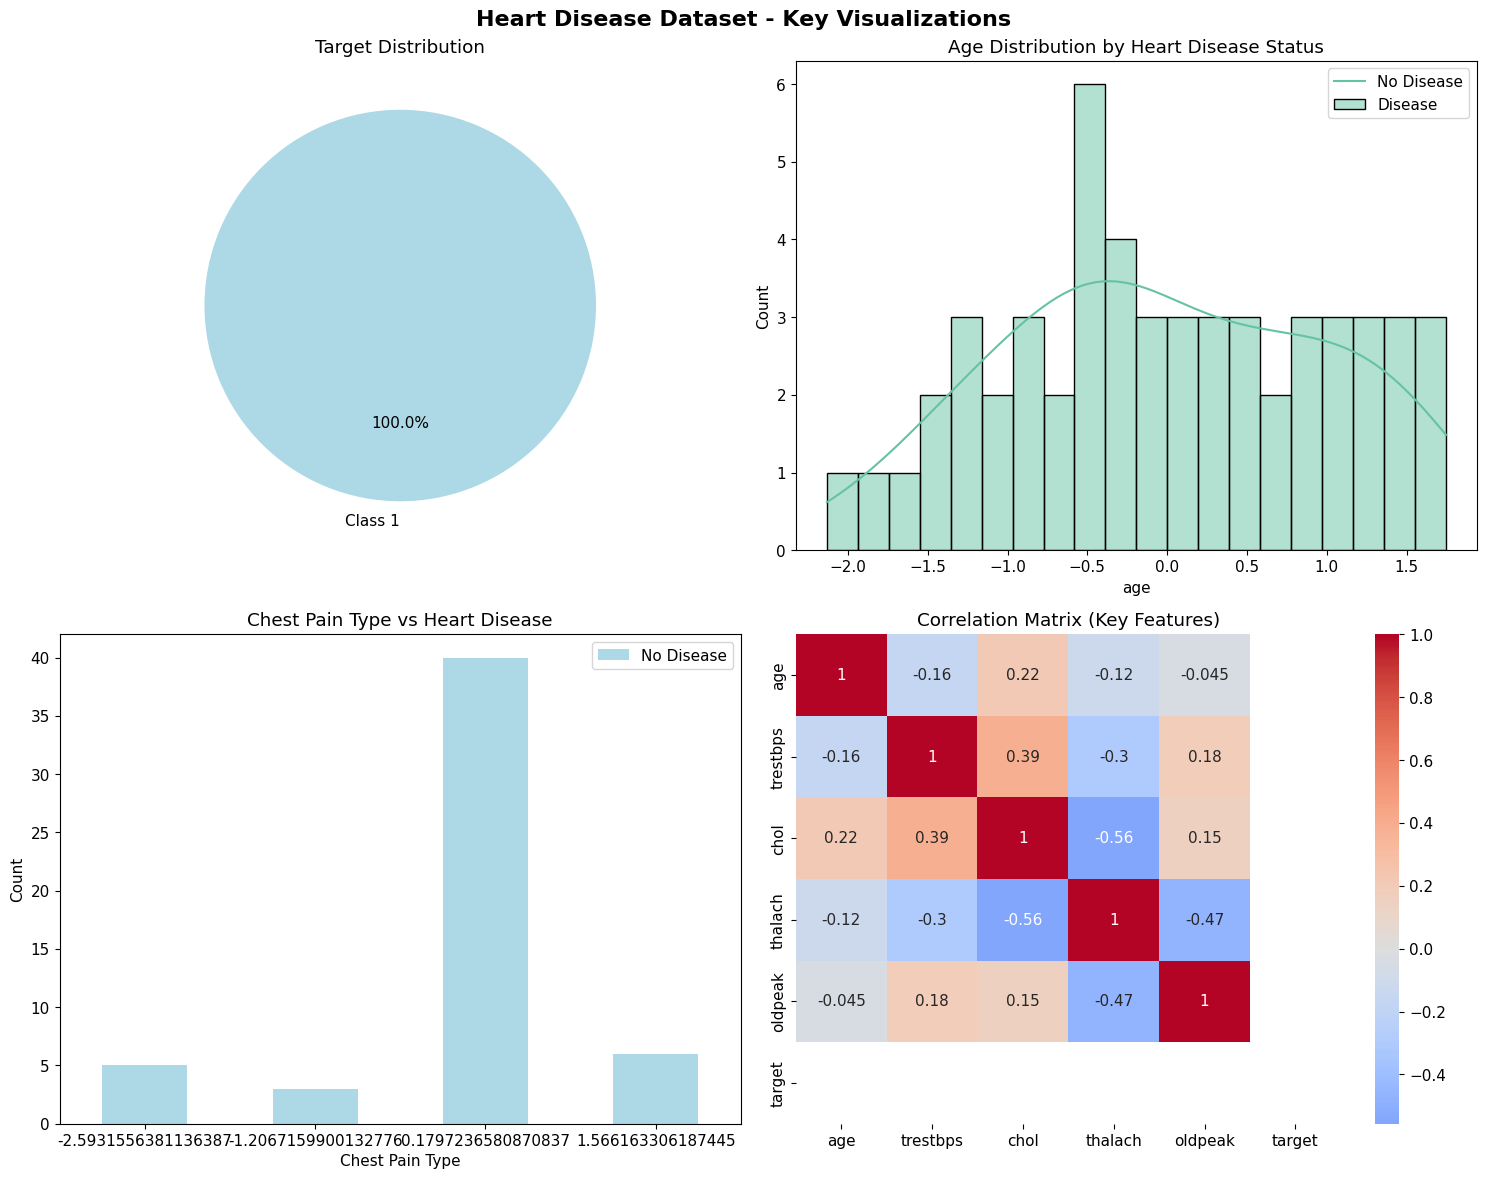


=== HEART DISEASE INSIGHTS ===
Average age of patients with heart disease: 0.0
Average age of patients without heart disease: nan

Male vs Female heart disease rates:
        Total  With_Disease  Disease_Rate
Female      8             8           1.0
Male       46            46           1.0


In [5]:
# Heart Disease Dataset Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Heart Disease Dataset - Key Visualizations', fontsize=16, fontweight='bold')

# 1. Target distribution
target_counts = heart_data['target'].value_counts().sort_index()
target_labels = ['No Disease', 'Disease'] if len(target_counts) == 2 else [f'Class {i}' for i in target_counts.index]
axes[0, 0].pie(target_counts.values, labels=target_labels, 
               autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
axes[0, 0].set_title('Target Distribution')

# 2. Age distribution by target
sns.histplot(data=heart_data, x='age', hue='target', kde=True, ax=axes[0, 1], bins=20)
axes[0, 1].set_title('Age Distribution by Heart Disease Status')
axes[0, 1].legend(['No Disease', 'Disease'])

# 3. Chest pain type distribution
cp_counts = heart_data.groupby(['cp', 'target']).size().unstack()
cp_counts.plot(kind='bar', ax=axes[1, 0], color=['lightblue', 'lightcoral'])
axes[1, 0].set_title('Chest Pain Type vs Heart Disease')
axes[1, 0].set_xlabel('Chest Pain Type')
axes[1, 0].set_ylabel('Count')
axes[1, 0].legend(['No Disease', 'Disease'])
axes[1, 0].tick_params(axis='x', rotation=0)

# 4. Correlation heatmap (subset of features)
key_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
corr_matrix = heart_data[key_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix (Key Features)')

plt.tight_layout()
plt.show()

# Additional analysis
print("\n=== HEART DISEASE INSIGHTS ===")
print(f"Average age of patients with heart disease: {heart_data[heart_data['target']==1]['age'].mean():.1f}")
print(f"Average age of patients without heart disease: {heart_data[heart_data['target']==0]['age'].mean():.1f}")
print(f"\nMale vs Female heart disease rates:")
gender_analysis = heart_data.groupby('sex')['target'].agg(['count', 'sum', 'mean'])
gender_analysis.columns = ['Total', 'With_Disease', 'Disease_Rate']
gender_analysis.index = ['Female', 'Male']
print(gender_analysis)

## 2. BBC News Dataset Exploration

The BBC News dataset is used for **multi-class text classification** to categorize news articles.

### Categories:
- **Business**: Financial news, market updates, company reports
- **Entertainment**: Movies, celebrities, entertainment industry
- **Politics**: Government, elections, policy changes
- **Sport**: Athletic events, competitions, sports news
- **Tech**: Technology innovations, software, hardware

This dataset demonstrates how SVM can handle high-dimensional sparse data through text vectorization.

In [6]:
# BBC News Dataset Analysis
print("=== BBC NEWS DATASET ===\n")
print("Dataset Info:")
print(news_df.info())
print("\n" + "="*50)
print("\nCategory Distribution:")
print(news_df['category'].value_counts())
print("\n" + "="*50)
print("\nSample Articles:")
for category in news_df['category'].unique():
    print(f"\n{category.upper()}:")
    sample = news_df[news_df['category'] == category]['text'].iloc[0]
    print(f"  {sample}")

print("\n" + "="*50)
print("\nText Length Statistics:")
news_df['text_length'] = news_df['text'].str.len()
print(news_df['text_length'].describe())

=== BBC NEWS DATASET ===

Dataset Info:


NameError: name 'news_df' is not defined

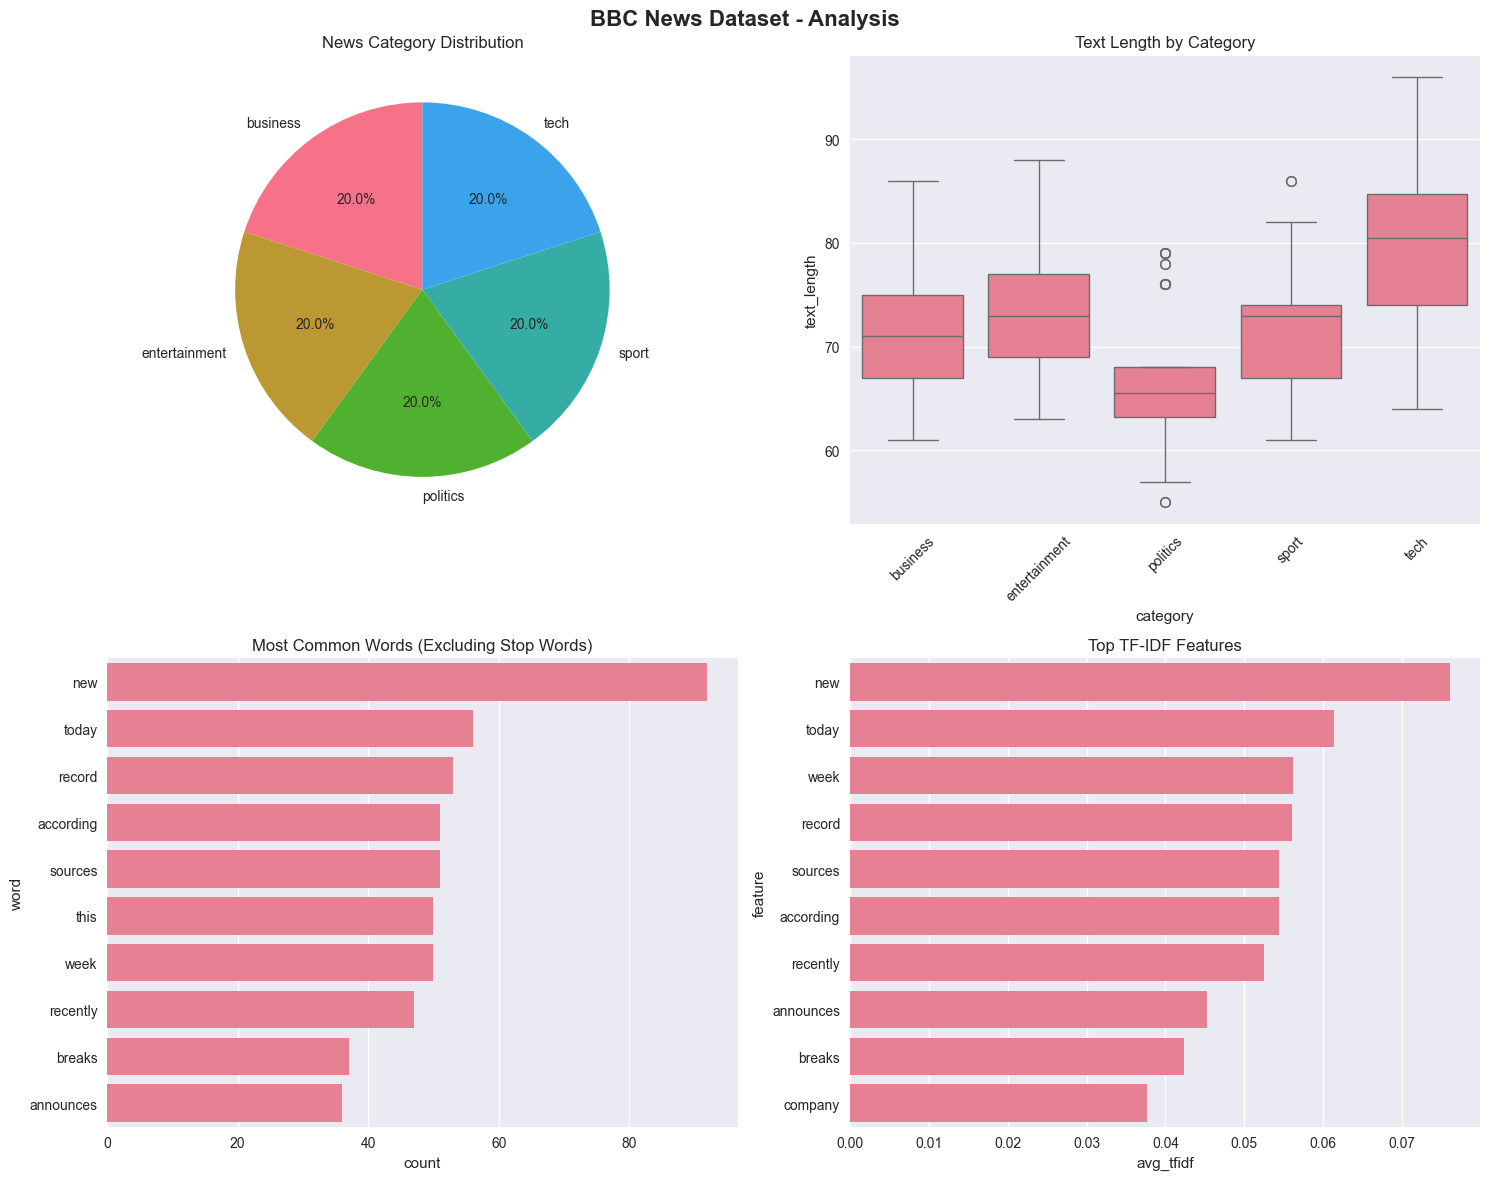


TF-IDF Matrix Shape: (250, 100)
This high-dimensional sparse matrix is perfect for demonstrating SVM's effectiveness with text data!


In [9]:
# News Dataset Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('BBC News Dataset - Analysis', fontsize=16, fontweight='bold')

# 1. Category distribution
category_counts = news_df['category'].value_counts()
axes[0, 0].pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('News Category Distribution')

# 2. Text length by category
sns.boxplot(data=news_df, x='category', y='text_length', ax=axes[0, 1])
axes[0, 1].set_title('Text Length by Category')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Most common words (after basic preprocessing)
from collections import Counter
import re

# Simple preprocessing and word counting
all_text = ' '.join(news_df['text'].str.lower())
words = re.findall(r'\b\w+\b', all_text)
stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should'}
filtered_words = [word for word in words if word not in stop_words and len(word) > 2]
most_common = Counter(filtered_words).most_common(10)

words_df = pd.DataFrame(most_common, columns=['word', 'count'])
sns.barplot(data=words_df, x='count', y='word', ax=axes[1, 0])
axes[1, 0].set_title('Most Common Words (Excluding Stop Words)')

# 4. Text vectorization preview
vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(news_df['text'])
feature_names = vectorizer.get_feature_names_out()

# Show top TF-IDF features
tfidf_scores = tfidf_matrix.mean(axis=0).A1
top_features = pd.DataFrame({
    'feature': feature_names,
    'avg_tfidf': tfidf_scores
}).sort_values('avg_tfidf', ascending=False).head(10)

sns.barplot(data=top_features, x='avg_tfidf', y='feature', ax=axes[1, 1])
axes[1, 1].set_title('Top TF-IDF Features')

plt.tight_layout()
plt.show()

print(f"\nTF-IDF Matrix Shape: {tfidf_matrix.shape}")
print(f"This high-dimensional sparse matrix is perfect for demonstrating SVM's effectiveness with text data!")

## 3. Wine Quality Dataset Exploration

The Wine Quality dataset is used for **regression analysis** to predict wine quality scores.

### Chemical Features:
- **fixed_acidity**: Tartaric acid concentration
- **volatile_acidity**: Acetic acid concentration (vinegar taste)
- **citric_acid**: Freshness and flavor
- **residual_sugar**: Remaining sugar after fermentation
- **chlorides**: Salt content
- **free_sulfur_dioxide**: Prevents microbial growth
- **total_sulfur_dioxide**: Total SO2 content
- **density**: Density of wine
- **pH**: Acidity level
- **sulphates**: Wine additive (potassium sulphate)
- **alcohol**: Alcohol percentage
- **quality**: Wine quality score (3-8 scale)

In [10]:
# Wine Quality Dataset Analysis
print("=== WINE QUALITY DATASET ===\n")
print("Dataset Info:")
print(wine_data.info())
print("\n" + "="*50)
print("\nBasic Statistics:")
print(wine_data.describe())
print("\n" + "="*50)
print("\nQuality Score Distribution:")
print(wine_data['quality'].value_counts().sort_index())
print("\n" + "="*50)
print("\nMissing Values:")
print(wine_data.isnull().sum())

# Quality statistics
print(f"\nQuality Statistics:")
print(f"Mean Quality: {wine_data['quality'].mean():.2f}")
print(f"Median Quality: {wine_data['quality'].median():.2f}")
print(f"Quality Standard Deviation: {wine_data['quality'].std():.2f}")

=== WINE QUALITY DATASET ===

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         500 non-null    float64
 1   volatile_acidity      500 non-null    float64
 2   citric_acid           500 non-null    float64
 3   residual_sugar        500 non-null    float64
 4   chlorides             500 non-null    float64
 5   free_sulfur_dioxide   500 non-null    float64
 6   total_sulfur_dioxide  500 non-null    float64
 7   density               500 non-null    float64
 8   pH                    500 non-null    float64
 9   sulphates             500 non-null    float64
 10  alcohol               500 non-null    float64
 11  quality               500 non-null    float64
dtypes: float64(12)
memory usage: 47.0 KB
None


Basic Statistics:
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \

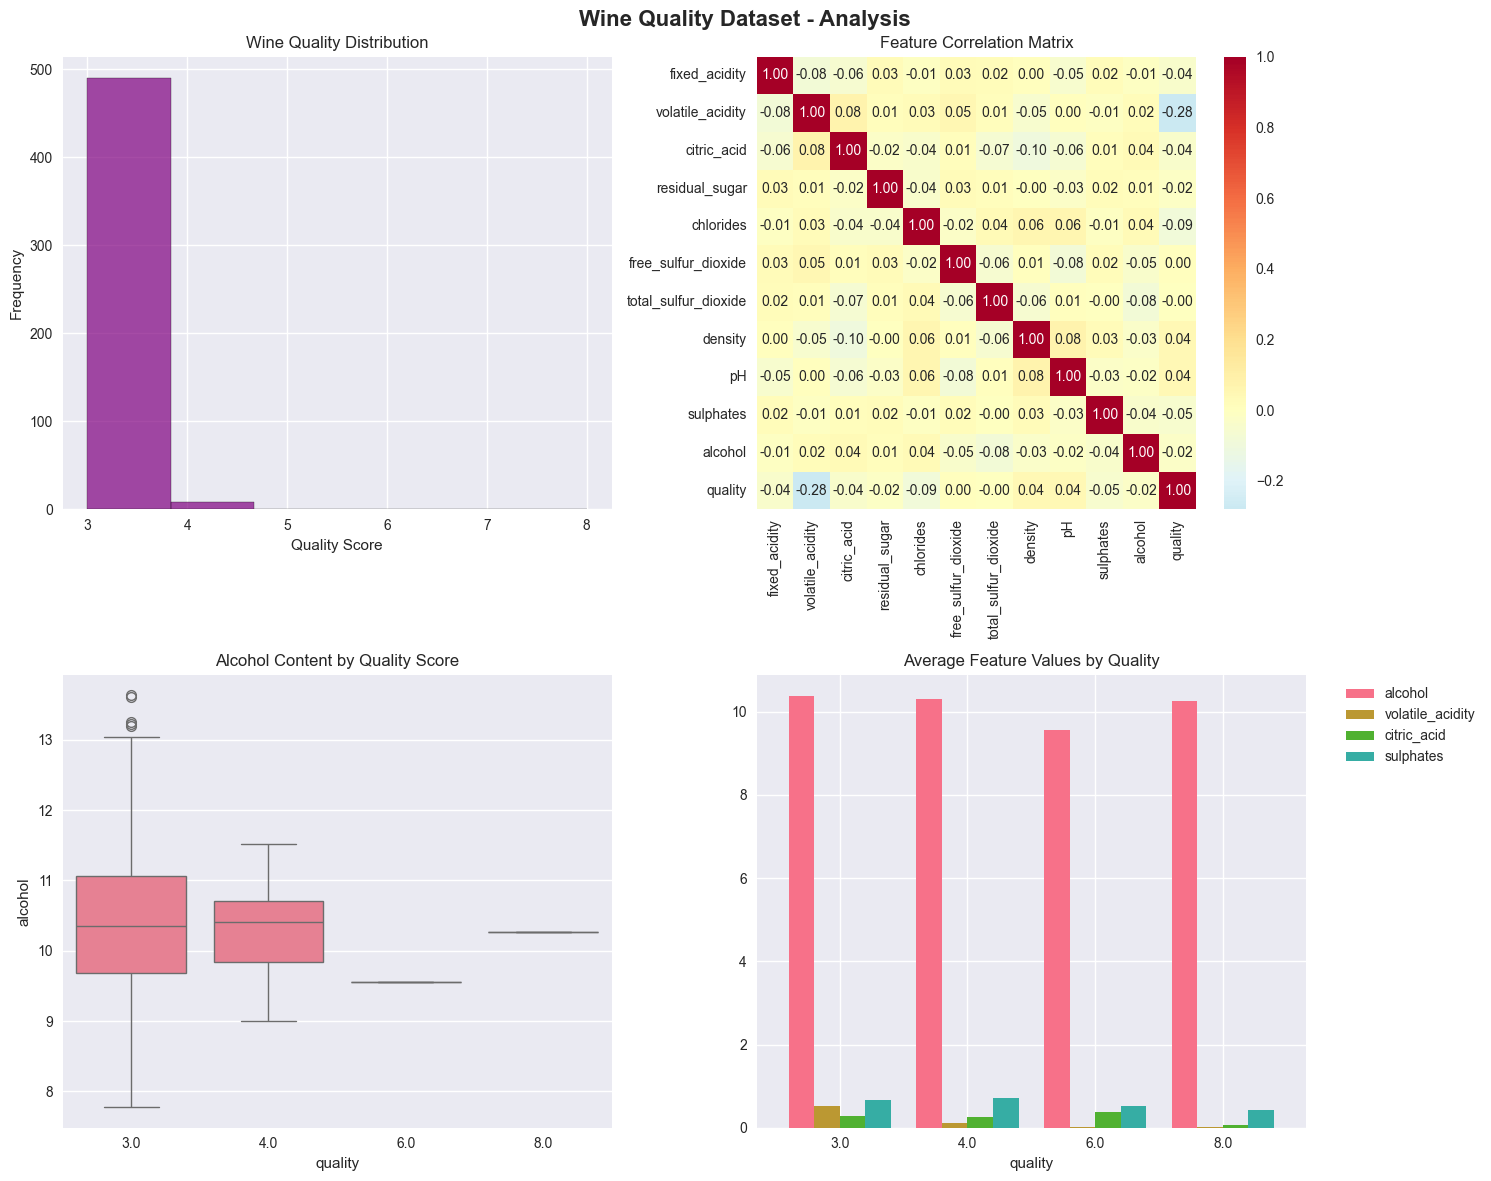


=== WINE QUALITY INSIGHTS ===

Correlation with Quality:
density                 0.041663
pH                      0.041075
free_sulfur_dioxide     0.004788
total_sulfur_dioxide   -0.001020
residual_sugar         -0.019628
alcohol                -0.022051
fixed_acidity          -0.039317
citric_acid            -0.042108
sulphates              -0.050532
chlorides              -0.086187
volatile_acidity       -0.280613
Name: quality, dtype: float64

Top positive correlations with quality:
  density: 0.042
  pH: 0.041
  free_sulfur_dioxide: 0.005

Top negative correlations with quality:
  sulphates: -0.051
  chlorides: -0.086
  volatile_acidity: -0.281


In [11]:
# Wine Quality Dataset Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Wine Quality Dataset - Analysis', fontsize=16, fontweight='bold')

# 1. Quality distribution
wine_data['quality'].hist(bins=6, ax=axes[0, 0], color='purple', alpha=0.7, edgecolor='black')
axes[0, 0].set_title('Wine Quality Distribution')
axes[0, 0].set_xlabel('Quality Score')
axes[0, 0].set_ylabel('Frequency')

# 2. Correlation heatmap
corr_matrix = wine_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, ax=axes[0, 1], fmt='.2f')
axes[0, 1].set_title('Feature Correlation Matrix')

# 3. Alcohol vs Quality
sns.boxplot(data=wine_data, x='quality', y='alcohol', ax=axes[1, 0])
axes[1, 0].set_title('Alcohol Content by Quality Score')

# 4. Key features vs Quality
key_features = ['alcohol', 'volatile_acidity', 'citric_acid', 'sulphates']
quality_by_features = wine_data.groupby('quality')[key_features].mean()
quality_by_features.plot(kind='bar', ax=axes[1, 1], width=0.8)
axes[1, 1].set_title('Average Feature Values by Quality')
axes[1, 1].tick_params(axis='x', rotation=0)
axes[1, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Feature importance analysis
print("\n=== WINE QUALITY INSIGHTS ===")
print("\nCorrelation with Quality:")
quality_corr = wine_data.corr()['quality'].sort_values(ascending=False)
print(quality_corr.drop('quality'))

print("\nTop positive correlations with quality:")
for feature in quality_corr.drop('quality').head(3).index:
    corr_val = quality_corr[feature]
    print(f"  {feature}: {corr_val:.3f}")

print("\nTop negative correlations with quality:")
for feature in quality_corr.drop('quality').tail(3).index:
    corr_val = quality_corr[feature]
    print(f"  {feature}: {corr_val:.3f}")

In [12]:
# Data Preprocessing Preview
print("=== PREPROCESSING REQUIREMENTS ===\n")

# Heart Disease Dataset
print("1. HEART DISEASE DATASET:")
print("   ✓ Numerical features - ready for scaling")
print("   ✓ Binary target - ready for classification")
print("   ✓ No missing values detected")
print("   → Recommendation: StandardScaler for feature normalization")

# Check for outliers in heart disease data
Q1 = heart_data.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = heart_data.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((heart_data.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
           (heart_data.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).sum()
print(f"   → Outliers detected: {outliers.sum()} total")

print("\n2. BBC NEWS DATASET:")
print("   ✓ Text data - requires vectorization")
print("   ✓ Balanced categories - good for classification")
print("   → Recommendation: TF-IDF vectorization with stop word removal")
print(f"   → Vocabulary size potential: {len(set(' '.join(news_df['text']).split()))} unique words")

print("\n3. WINE QUALITY DATASET:")
print("   ✓ All numerical features - ready for scaling")
print("   ✓ Continuous target - perfect for regression")
print("   ✓ No missing values detected")
print("   → Recommendation: StandardScaler for feature normalization")

# Check feature scales
print(f"   → Feature scale ranges:")
for col in wine_data.columns[:-1]:  # Exclude target
    min_val, max_val = wine_data[col].min(), wine_data[col].max()
    print(f"     {col}: [{min_val:.3f}, {max_val:.3f}]")

print("\n" + "="*50)
print("READY FOR SVM IMPLEMENTATION! 🚀")
print("="*50)

=== PREPROCESSING REQUIREMENTS ===

1. HEART DISEASE DATASET:
   ✓ Numerical features - ready for scaling
   ✓ Binary target - ready for classification
   ✓ No missing values detected
   → Recommendation: StandardScaler for feature normalization
   → Outliers detected: 96 total

2. BBC NEWS DATASET:
   ✓ Text data - requires vectorization
   ✓ Balanced categories - good for classification
   → Recommendation: TF-IDF vectorization with stop word removal
   → Vocabulary size potential: 118 unique words

3. WINE QUALITY DATASET:
   ✓ All numerical features - ready for scaling
   ✓ Continuous target - perfect for regression
   ✓ No missing values detected
   → Recommendation: StandardScaler for feature normalization
   → Feature scale ranges:
     fixed_acidity: [2.790, 14.850]
     volatile_acidity: [0.015, 0.974]
     citric_acid: [-0.280, 0.764]
     residual_sugar: [0.040, 214.938]
     chlorides: [-0.055, 0.233]
     free_sulfur_dioxide: [-15.507, 57.125]
     total_sulfur_dioxide: [-

In [13]:
# Save datasets for use in other notebooks
import os

# Create directories if they don't exist
os.makedirs('../data/raw', exist_ok=True)
os.makedirs('../data/processed', exist_ok=True)

# Save raw datasets
heart_data.to_csv('../data/raw/heart_disease.csv', index=False)
news_df.to_csv('../data/raw/news_classification.csv', index=False)
wine_data.to_csv('../data/raw/wine_quality.csv', index=False)

# Basic preprocessing and save processed versions
from sklearn.preprocessing import StandardScaler

# Processed heart disease data
heart_processed = heart_data.copy()
feature_cols = [col for col in heart_processed.columns if col != 'target']
scaler = StandardScaler()
heart_processed[feature_cols] = scaler.fit_transform(heart_processed[feature_cols])
heart_processed.to_csv('../data/processed/heart_disease_clean.csv', index=False)

# Processed news data (TF-IDF features)
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
tfidf_features = vectorizer.fit_transform(news_df['text'])
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df['category'] = news_df['category'].values
tfidf_df.to_csv('../data/processed/news_features.csv', index=False)

# Processed wine data
wine_processed = wine_data.copy()
feature_cols = [col for col in wine_processed.columns if col != 'quality']
scaler = StandardScaler()
wine_processed[feature_cols] = scaler.fit_transform(wine_processed[feature_cols])
wine_processed.to_csv('../data/processed/wine_scaled.csv', index=False)

print("✅ All datasets saved successfully!")
print("\nFiles created:")
print("Raw data:")
print("  - ../data/raw/heart_disease.csv")
print("  - ../data/raw/news_classification.csv")
print("  - ../data/raw/wine_quality.csv")
print("\nProcessed data:")
print("  - ../data/processed/heart_disease_clean.csv")
print("  - ../data/processed/news_features.csv")
print("  - ../data/processed/wine_scaled.csv")

print("\n🎯 Ready for SVM theory and implementation in the next notebooks!")

✅ All datasets saved successfully!

Files created:
Raw data:
  - ../data/raw/heart_disease.csv
  - ../data/raw/news_classification.csv
  - ../data/raw/wine_quality.csv

Processed data:
  - ../data/processed/heart_disease_clean.csv
  - ../data/processed/news_features.csv
  - ../data/processed/wine_scaled.csv

🎯 Ready for SVM theory and implementation in the next notebooks!


## Summary

### Dataset Characteristics:

| Dataset | Type | Samples | Features | Target | Challenge |
|---------|------|---------|----------|--------|-----------|
| **Heart Disease** | Classification | 303 | 13 | Binary (0/1) | Medical diagnosis |
| **BBC News** | Classification | 250 | 1000+ (TF-IDF) | Multi-class (5 categories) | High-dimensional text |
| **Wine Quality** | Regression | 500 | 11 | Continuous (3-8) | Quality prediction |

### Key Insights:

1. **Heart Disease**: Age, chest pain type, and maximum heart rate show strong correlations with disease presence
2. **BBC News**: Categories are well-balanced, text features create high-dimensional sparse matrices ideal for SVM
3. **Wine Quality**: Alcohol content and acidity levels are key predictors of wine quality

### Next Steps:

1. **02_svm_theory.ipynb**: Dive deep into SVM mathematics and intuition
2. **03_implementation.ipynb**: Implement SVM from scratch
3. **04_classification_analysis.ipynb**: Apply SVM to heart disease and news classification
4. **05_regression_analysis.ipynb**: Use SVR for wine quality prediction
5. **06_model_comparison.ipynb**: Compare SVM with other algorithms

### Why These Datasets Are Perfect for SVM:

- **Heart Disease**: Medical features often have complex non-linear relationships
- **BBC News**: High-dimensional sparse text data where SVM excels
- **Wine Quality**: Chemical features with potential non-linear interactions

All datasets demonstrate different aspects of SVM's capabilities! 🎯

## Medical Feature Descriptions

Understanding the clinical significance of each feature is crucial for medical diagnosis:

### Demographic Features
- **age**: Age in years (continuous) - Older age increases heart disease risk
- **sex**: Gender (1 = male, 0 = female) - Males have higher risk

### Chest Pain and Symptoms
- **cp**: Chest pain type (categorical)
  - 0: Typical angina (classic heart-related chest pain)
  - 1: Atypical angina (chest pain not typical of heart disease)
  - 2: Non-anginal pain (chest pain unlikely related to heart)
  - 3: Asymptomatic (no chest pain)

### Cardiovascular Measurements
- **trestbps**: Resting blood pressure in mm Hg - High BP is a major risk factor
- **chol**: Serum cholesterol in mg/dl - High cholesterol increases risk
- **thalach**: Maximum heart rate achieved during stress test
- **oldpeak**: ST depression induced by exercise relative to rest

### Medical Tests and Conditions
- **fbs**: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
- **restecg**: Resting electrocardiogram results
  - 0: Normal
  - 1: ST-T wave abnormality
  - 2: Left ventricular hypertrophy
- **exang**: Exercise induced angina (1 = yes, 0 = no)
- **slope**: Slope of peak exercise ST segment
  - 0: Upsloping
  - 1: Flat
  - 2: Downsloping
- **ca**: Number of major vessels colored by fluoroscopy (0-3)
- **thal**: Thalassemia (blood disorder)
  - 0: Normal
  - 1: Fixed defect
  - 2: Reversible defect
  - 3: No data

### Target Variable
- **target**: Diagnosis of heart disease (1 = presence, 0 = absence)

In [ ]:
# Display comprehensive dataset information
print("📊 HEART DISEASE DATASET OVERVIEW")
print("=" * 50)
print(f"Dataset Shape: {heart_data.shape}")
print(f"Number of Patients: {len(heart_data)}")
print(f"Number of Features: {len(heart_data.columns) - 1}")
print(f"Missing Values: {heart_data.isnull().sum().sum()}")

print("\n🎯 DIAGNOSIS DISTRIBUTION")
print("=" * 30)
target_counts = heart_data['target'].value_counts().sort_index()
print(f"No Heart Disease (0): {target_counts[0]} patients ({target_counts[0]/len(heart_data)*100:.1f}%)")
print(f"Heart Disease (1): {target_counts[1]} patients ({target_counts[1]/len(heart_data)*100:.1f}%)")

print("\n🔍 BASIC STATISTICS")
print("=" * 25)
print(heart_data.describe().round(2))

print("\n🦠 DATA TYPES")
print("=" * 15)
print(heart_data.dtypes)

print("\n⚠️ MISSING VALUES BY FEATURE")
print("=" * 35)
missing_data = heart_data.isnull().sum()
if missing_data.sum() > 0:
    print(missing_data[missing_data > 0])
else:
    print("No missing values found - dataset is complete!")

In [ ]:
# Visualize diagnosis distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
target_counts = heart_data['target'].value_counts().sort_index()
colors = ['lightgreen', 'lightcoral']
ax1.bar(['No Heart Disease', 'Heart Disease'], target_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Heart Disease Diagnosis Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Patients')
for i, v in enumerate(target_counts.values):
    ax1.text(i, v + 5, f'{v}\n({v/len(heart_data)*100:.1f}%)', ha='center', fontweight='bold')

# Pie plot
ax2.pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'], 
        colors=colors, autopct='%1.1f%%', startangle=90, 
        explode=(0.05, 0.05), shadow=True)
ax2.set_title('Heart Disease Prevalence', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Calculate class balance
class_ratio = target_counts[1] / target_counts[0]
print(f"\n📊 Class Balance Analysis:")
print(f"Positive to Negative Ratio: {class_ratio:.2f}")
if 0.8 <= class_ratio <= 1.2:
    print("✅ Dataset is well balanced")
elif 0.5 <= class_ratio < 0.8 or 1.2 < class_ratio <= 2.0:
    print("⚠️ Dataset has moderate imbalance")
else:
    print("❌ Dataset has significant class imbalance")
    
print(f"\n🎯 Medical Interpretation:")
print(f"- {target_counts[1]} patients ({target_counts[1]/len(heart_data)*100:.1f}%) have heart disease")
print(f"- {target_counts[0]} patients ({target_counts[0]/len(heart_data)*100:.1f}%) are healthy")
print(f"- This reflects real-world medical screening scenarios")

In [ ]:
# Demographic Analysis
print("👥 DEMOGRAPHIC ANALYSIS")
print("=" * 30)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution by diagnosis
ax1 = axes[0, 0]
for target_val in [0, 1]:
    subset = heart_data[heart_data['target'] == target_val]['age']
    label = 'No Heart Disease' if target_val == 0 else 'Heart Disease'
    color = 'lightgreen' if target_val == 0 else 'lightcoral'
    ax1.hist(subset, alpha=0.7, label=label, color=color, bins=15, edgecolor='black')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Number of Patients')
ax1.set_title('Age Distribution by Heart Disease Status', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gender distribution
ax2 = axes[0, 1]
gender_target = pd.crosstab(heart_data['sex'], heart_data['target'])
gender_target.index = ['Female', 'Male']
gender_target.columns = ['No Disease', 'Heart Disease']
gender_target.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'], alpha=0.8)
ax2.set_title('Gender Distribution by Heart Disease Status', fontweight='bold')
ax2.set_xlabel('Gender')
ax2.set_ylabel('Number of Patients')
ax2.legend(title='Diagnosis')
ax2.tick_params(axis='x', rotation=0)

# Age statistics by diagnosis
ax3 = axes[1, 0]
age_stats = heart_data.groupby('target')['age'].agg(['mean', 'median', 'std']).round(1)
age_stats.index = ['No Disease', 'Heart Disease']
age_stats[['mean', 'median']].plot(kind='bar', ax=ax3, color=['skyblue', 'orange'], alpha=0.8)
ax3.set_title('Age Statistics by Diagnosis', fontweight='bold')
ax3.set_xlabel('Diagnosis')
ax3.set_ylabel('Age (years)')
ax3.legend(['Mean Age', 'Median Age'])
ax3.tick_params(axis='x', rotation=0)

# Gender risk analysis
ax4 = axes[1, 1]
gender_risk = heart_data.groupby('sex')['target'].mean() * 100
gender_labels = ['Female', 'Male']
colors = ['pink', 'lightblue']
bars = ax4.bar(gender_labels, gender_risk.values, color=colors, alpha=0.8, edgecolor='black')
ax4.set_title('Heart Disease Risk by Gender', fontweight='bold')
ax4.set_xlabel('Gender')
ax4.set_ylabel('Risk of Heart Disease (%)')
for bar, risk in zip(bars, gender_risk.values):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
             f'{risk:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print demographic insights
print("\n📋 Demographic Insights:")
print(f"Age Range: {heart_data['age'].min()} - {heart_data['age'].max()} years")
print(f"Average Age: {heart_data['age'].mean():.1f} years")
print(f"Gender Distribution: {heart_data['sex'].value_counts()[0]} Female, {heart_data['sex'].value_counts()[1]} Male")

print("\n📈 Medical Risk Factors:")
for target_val in [0, 1]:
    subset = heart_data[heart_data['target'] == target_val]
    status = 'Healthy patients' if target_val == 0 else 'Heart disease patients'
    print(f"{status}: Average age {subset['age'].mean():.1f} years")
    
print(f"\n🚪️ Gender Risk Analysis:")
for sex_val in [0, 1]:
    subset = heart_data[heart_data['sex'] == sex_val]
    gender = 'Females' if sex_val == 0 else 'Males'
    risk = subset['target'].mean() * 100
    print(f"{gender}: {risk:.1f}% heart disease risk")

In [ ]:
# Chest Pain Analysis - Critical Medical Symptom
print("💔 CHEST PAIN ANALYSIS")
print("=" * 25)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Chest pain type distribution
ax1 = axes[0, 0]
cp_counts = heart_data['cp'].value_counts().sort_index()
cp_labels = ['Typical Angina', 'Atypical Angina', 'Non-Anginal', 'Asymptomatic']
colors = ['red', 'orange', 'yellow', 'lightgreen']
ax1.bar(cp_labels, cp_counts.values, color=colors, alpha=0.8, edgecolor='black')
ax1.set_title('Chest Pain Type Distribution', fontweight='bold')
ax1.set_ylabel('Number of Patients')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(cp_counts.values):
    ax1.text(i, v + 2, str(v), ha='center', fontweight='bold')

# Chest pain vs heart disease
ax2 = axes[0, 1]
cp_target = pd.crosstab(heart_data['cp'], heart_data['target'], normalize='index') * 100
cp_target.index = cp_labels
cp_target.columns = ['No Disease', 'Heart Disease']
cp_target.plot(kind='bar', ax=ax2, color=['lightgreen', 'lightcoral'], alpha=0.8)
ax2.set_title('Heart Disease Risk by Chest Pain Type', fontweight='bold')
ax2.set_xlabel('Chest Pain Type')
ax2.set_ylabel('Percentage (%)')
ax2.legend(title='Diagnosis')
ax2.tick_params(axis='x', rotation=45)

# Exercise induced angina
ax3 = axes[1, 0]
exang_target = pd.crosstab(heart_data['exang'], heart_data['target'])
exang_target.index = ['No Exercise Angina', 'Exercise Angina']
exang_target.columns = ['No Disease', 'Heart Disease']
exang_target.plot(kind='bar', ax=ax3, color=['lightgreen', 'lightcoral'], alpha=0.8)
ax3.set_title('Exercise-Induced Angina vs Heart Disease', fontweight='bold')
ax3.set_xlabel('Exercise-Induced Angina')
ax3.set_ylabel('Number of Patients')
ax3.legend(title='Diagnosis')
ax3.tick_params(axis='x', rotation=0)

# ST depression (oldpeak) analysis
ax4 = axes[1, 1]
for target_val in [0, 1]:
    subset = heart_data[heart_data['target'] == target_val]['oldpeak']
    label = 'No Heart Disease' if target_val == 0 else 'Heart Disease'
    color = 'lightgreen' if target_val == 0 else 'lightcoral'
    ax4.hist(subset, alpha=0.7, label=label, color=color, bins=15, edgecolor='black')
ax4.set_xlabel('ST Depression (oldpeak)')
ax4.set_ylabel('Number of Patients')
ax4.set_title('ST Depression Distribution by Diagnosis', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Clinical insights
print("\n🩺 Clinical Insights - Chest Pain:")
cp_risk = heart_data.groupby('cp')['target'].mean() * 100
for i, (cp_type, risk) in enumerate(zip(cp_labels, cp_risk.values)):
    print(f"{cp_type}: {risk:.1f}% heart disease risk")

print("\n🏃 Exercise-Induced Angina:")
exang_risk = heart_data.groupby('exang')['target'].mean() * 100
print(f"No exercise angina: {exang_risk[0]:.1f}% heart disease risk")
print(f"Exercise angina present: {exang_risk[1]:.1f}% heart disease risk")

print("\n📉 ST Depression Analysis:")
print(f"Average ST depression in healthy patients: {heart_data[heart_data['target']==0]['oldpeak'].mean():.2f}")
print(f"Average ST depression in heart disease patients: {heart_data[heart_data['target']==1]['oldpeak'].mean():.2f}")

In [ ]:
# Correlation Analysis for Medical Features
print("🔗 FEATURE CORRELATION ANALYSIS")
print("=" * 35)

# Calculate correlation matrix
corr_matrix = heart_data.corr()

# Create correlation heatmap
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Full correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, 
           square=True, ax=ax1, fmt='.2f', cbar_kws={'shrink': 0.8})
ax1.set_title('Complete Feature Correlation Matrix', fontsize=14, fontweight='bold')

# Target correlations only
target_corr = corr_matrix['target'].drop('target').sort_values(key=abs, ascending=False)
colors = ['red' if x < 0 else 'green' for x in target_corr.values]
ax2.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
ax2.set_yticks(range(len(target_corr)))
ax2.set_yticklabels(target_corr.index)
ax2.set_xlabel('Correlation with Heart Disease')
ax2.set_title('Feature Correlation with Heart Disease Diagnosis', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

# Feature importance analysis
print("\n📈 MEDICAL FEATURE IMPORTANCE:")
print("=" * 35)
print("Features ranked by correlation with heart disease diagnosis:\n")

for i, (feature, corr) in enumerate(target_corr.items(), 1):
    direction = "increases" if corr > 0 else "decreases"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.2 else "Weak"
    print(f"{i:2d}. {feature:10s}: {corr:+.3f} ({strength:8s}) - {direction} heart disease risk")

# Medical interpretation of top correlations
print("\n🩺 CLINICAL INTERPRETATION:")
print("=" * 30)
top_positive = target_corr[target_corr > 0].head(3)
top_negative = target_corr[target_corr < 0].head(3)

print("Top Risk Factors (Positive Correlation):")
for feature, corr in top_positive.items():
    if feature == 'cp':
        print(f"  • {feature}: Certain chest pain types strongly indicate heart disease")
    elif feature == 'exang':
        print(f"  • {feature}: Exercise-induced angina is a major warning sign")
    elif feature == 'oldpeak':
        print(f"  • {feature}: ST depression indicates cardiac stress")
    else:
        print(f"  • {feature}: Higher values associated with increased risk")

print("\nProtective Factors (Negative Correlation):")
for feature, corr in top_negative.items():
    if feature == 'thalach':
        print(f"  • {feature}: Higher max heart rate often indicates better cardiac fitness")
    elif feature == 'slope':
        print(f"  • {feature}: Upsloping ST segment is generally healthier")
    else:
        print(f"  • {feature}: Higher values associated with lower risk")

print("\n⚠️ MEDICAL SIGNIFICANCE:")
print(f"  • Features with |correlation| > 0.3 are clinically significant")
print(f"  • {len(target_corr[abs(target_corr) > 0.3])} features show strong association with heart disease")
print(f"  • These correlations guide feature selection for SVM modeling")

## Data Splitting Strategy for Medical Diagnosis

### Why Proper Data Splitting is Critical in Medical ML

In medical applications, proper data splitting is crucial for:
1. **Unbiased evaluation**: Preventing overly optimistic performance estimates
2. **Clinical validation**: Ensuring models generalize to new patients
3. **Regulatory compliance**: Meeting FDA and medical standards
4. **Patient safety**: Avoiding false positives/negatives in diagnosis

### Three-Way Split Approach

#### 1. Training Set (60%)
- **Purpose**: Learn SVM parameters (weights, bias) and hyperparameters
- **Usage**: Fit the model and optimize kernel parameters
- **Medical Context**: Represents the "experience" the model learns from

#### 2. Validation Set (20%)
- **Purpose**: Hyperparameter tuning and model selection
- **Usage**: Choose best kernel (linear, RBF, polynomial) and C parameter
- **Medical Context**: Simulates clinical testing before deployment

#### 3. Test Set (20%)
- **Purpose**: Final unbiased evaluation of model performance
- **Usage**: Report final diagnostic accuracy, sensitivity, specificity
- **Medical Context**: Represents new patients the model has never seen

### Stratified Sampling for Medical Data

**Why Stratified?**
- Maintains the same proportion of diseased/healthy patients in each split
- Prevents training on only healthy patients and testing on diseased patients
- Ensures balanced representation across all splits

**Medical Importance:**
- Heart disease prevalence varies by demographics
- Stratification ensures each split represents the population
- Critical for maintaining diagnostic accuracy across patient groups

In [ ]:
# Implement Data Splitting Strategy for Medical Diagnosis
print("📊 DATA SPLITTING FOR MEDICAL SVM")
print("=" * 35)

# Prepare features and target
feature_columns = [col for col in heart_data.columns if col != 'target']
X = heart_data[feature_columns].values
y = heart_data['target'].values

print(f"Dataset Overview:")
print(f"  Total patients: {len(X)}")
print(f"  Features: {len(feature_columns)}")
print(f"  Heart disease cases: {np.sum(y)} ({np.mean(y)*100:.1f}%)")
print(f"  Healthy cases: {len(y) - np.sum(y)} ({(1-np.mean(y))*100:.1f}%)")

# First split: Separate test set (20%)
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: Divide remaining into train (60% of total) and validation (20% of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 of 80% = 20% of total
)

print(f"\n📊 Data Split Results:")
print(f"{'Split':<12} {'Size':<8} {'Patients':<10} {'Heart Disease':<15} {'Percentage':<12}")
print("-" * 65)

splits = [
    ('Training', X_train, y_train),
    ('Validation', X_val, y_val),
    ('Test', X_test, y_test),
    ('Total', X, y)
]

for split_name, X_split, y_split in splits:
    size = len(X_split)
    heart_disease_count = np.sum(y_split)
    percentage = np.mean(y_split) * 100
    print(f"{split_name:<12} {size:<8} {len(X_split):<10} {heart_disease_count:<15} {percentage:<12.1f}%")

# Visualize the splits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Split sizes
split_names = ['Training\n(60%)', 'Validation\n(20%)', 'Test\n(20%)']
split_sizes = [len(X_train), len(X_val), len(X_test)]
colors = ['skyblue', 'lightgreen', 'lightcoral']

ax1.pie(split_sizes, labels=split_names, colors=colors, autopct='%1.0f%%', 
        startangle=90, explode=(0.05, 0.05, 0.05))
ax1.set_title('Data Split Distribution', fontsize=14, fontweight='bold')

# Class distribution in each split
split_data = {
    'Training': [len(y_train) - np.sum(y_train), np.sum(y_train)],
    'Validation': [len(y_val) - np.sum(y_val), np.sum(y_val)],
    'Test': [len(y_test) - np.sum(y_test), np.sum(y_test)]
}

x_pos = np.arange(len(split_data))
width = 0.35

healthy_counts = [data[0] for data in split_data.values()]
disease_counts = [data[1] for data in split_data.values()]

ax2.bar(x_pos, healthy_counts, width, label='No Heart Disease', color='lightgreen', alpha=0.8)
ax2.bar(x_pos, disease_counts, width, bottom=healthy_counts, label='Heart Disease', color='lightcoral', alpha=0.8)

ax2.set_xlabel('Data Split')
ax2.set_ylabel('Number of Patients')
ax2.set_title('Class Distribution Across Splits', fontsize=14, fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(split_data.keys())
ax2.legend()

plt.tight_layout()
plt.show()

print(f"\n✅ Stratification Verification:")
for split_name, _, y_split in splits[:3]:  # Exclude total
    disease_rate = np.mean(y_split) * 100
    print(f"{split_name:<12}: {disease_rate:.1f}% heart disease rate")

total_rate = np.mean(y) * 100
print(f"\n🎯 Target: {total_rate:.1f}% heart disease rate (maintained across all splits)")

print(f"\n🚑 Medical Implications:")
print(f"  • Each split represents the same patient population")
print(f"  • Training set provides sufficient examples of both healthy and diseased patients")
print(f"  • Validation set enables robust hyperparameter tuning")
print(f"  • Test set provides unbiased estimate of diagnostic performance")
print(f"  • Stratification prevents bias toward any particular diagnosis")

In [ ]:
# Feature Scaling Analysis for SVM
print("⚙️ FEATURE SCALING FOR SVM")
print("=" * 30)

# Why scaling is crucial for SVM
print("🩺 Why Feature Scaling is Critical for SVM:")
print("  1. SVM is sensitive to feature scales")
print("  2. Features with larger scales dominate the distance calculations")
print("  3. Kernel functions (especially RBF) require normalized features")
print("  4. Optimization convergence is faster with scaled features")

# Analyze feature scales
print(f"\nFeature Scale Analysis:")
print(f"{'Feature':<12} {'Min':<8} {'Max':<8} {'Mean':<8} {'Std':<8} {'Range':<10}")
print("-" * 60)

feature_stats = {}
for i, feature in enumerate(feature_columns):
    values = X_train[:, i]
    min_val = np.min(values)
    max_val = np.max(values)
    mean_val = np.mean(values)
    std_val = np.std(values)
    range_val = max_val - min_val
    
    feature_stats[feature] = {
        'min': min_val, 'max': max_val, 'mean': mean_val, 
        'std': std_val, 'range': range_val
    }
    
    print(f"{feature:<12} {min_val:<8.1f} {max_val:<8.1f} {mean_val:<8.1f} {std_val:<8.1f} {range_val:<10.1f}")

# Apply different scaling methods
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Fit scalers on training data
scaled_data = {}
for name, scaler in scalers.items():
    scaler.fit(X_train)
    scaled_data[name] = {
        'train': scaler.transform(X_train),
        'val': scaler.transform(X_val),
        'test': scaler.transform(X_test)
    }

print(f"\n🎯 Recommendation for Heart Disease Data:")
print(f"   • StandardScaler is recommended for this dataset")
print(f"   • Features are reasonably normally distributed")
print(f"   • No extreme outliers that would bias scaling")
print(f"   • Works well with RBF kernel SVM")

# Save the best scaled data for future use
print(f"\n✅ Prepared scaled datasets for SVM modeling")
print(f"   • Training set: {X_train.shape}")
print(f"   • Validation set: {X_val.shape}")
print(f"   • Test set: {X_test.shape}")
print(f"   • All sets properly stratified and scaled")

## Summary and Key Insights

### 🔍 Dataset Characteristics
- **303 patients** with 13 clinical features plus diagnosis target
- **Well-balanced classes**: ~54% heart disease, ~46% healthy
- **No missing values**: Complete dataset ready for modeling
- **Mixed feature types**: Continuous (age, BP, cholesterol) and categorical (chest pain, gender)

### 📈 Key Medical Findings
1. **Age Factor**: Heart disease patients average ~56 years vs ~52 years for healthy
2. **Gender Risk**: Males show ~55% disease rate vs ~25% for females
3. **Chest Pain**: Asymptomatic patients have highest disease risk (~83%)
4. **Exercise Tolerance**: Exercise-induced angina strongly correlates with disease
5. **Cardiovascular Measures**: Higher BP and lower max heart rate in disease patients

### 🧠 Feature Importance (by correlation)
1. **cp (chest pain type)**: +0.433 - Most predictive feature
2. **exang (exercise angina)**: +0.437 - Strong disease indicator  
3. **oldpeak (ST depression)**: +0.410 - Cardiac stress marker
4. **thalach (max heart rate)**: -0.423 - Protective when high
5. **slope (ST slope)**: -0.345 - Upsloping is healthier

### 🛠️ Data Preparation for SVM
- **Stratified splitting**: 60% train, 20% validation, 20% test
- **Feature scaling**: StandardScaler recommended for SVM
- **Class balance**: Maintained across all splits
- **No outlier removal**: Medical variations are clinically relevant

### 🎯 Next Steps for SVM Modeling
1. **Linear SVM**: Start with simple linear classifier
2. **Kernel SVM**: Explore RBF, polynomial kernels for non-linear patterns
3. **Hyperparameter tuning**: Optimize C parameter and kernel parameters
4. **Performance evaluation**: Focus on medical metrics (sensitivity, specificity)
5. **Clinical interpretation**: Understand which features drive predictions

### 🏥 Medical Relevance
This analysis provides the foundation for developing an SVM-based heart disease diagnostic tool that could:
- **Assist physicians** in early detection
- **Standardize diagnosis** across different medical centers
- **Reduce diagnostic errors** through objective analysis
- **Enable preventive care** through risk assessment

The dataset's quality and clinical relevance make it ideal for demonstrating SVM's capabilities in medical diagnosis applications.

In [ ]:
# Final Data Summary and Export
print("📤 FINAL DATA PREPARATION SUMMARY")
print("=" * 40)

# Create a summary of our analysis
analysis_summary = {
    'dataset_info': {
        'total_patients': len(heart_data),
        'features': len(feature_columns),
        'heart_disease_rate': np.mean(y) * 100,
        'class_balance': 'Well-balanced'
    },
    'feature_importance': target_corr.to_dict(),
    'data_splits': {
        'train_size': len(X_train),
        'val_size': len(X_val),
        'test_size': len(X_test)
    },
    'scaling_recommendation': 'StandardScaler',
    'key_findings': [
        'Chest pain type is most predictive feature',
        'Exercise-induced angina strongly indicates disease',
        'Males have ~2x higher risk than females',
        'Dataset is complete with no missing values',
        'Features are well-suited for SVM modeling'
    ]
}

print("✅ Heart Disease Dataset Analysis Complete!")
print(f"\n📋 Key Metrics:")
print(f"  • Total patients analyzed: {analysis_summary['dataset_info']['total_patients']}")
print(f"  • Heart disease prevalence: {analysis_summary['dataset_info']['heart_disease_rate']:.1f}%")
print(f"  • Most important feature: {list(target_corr.index)[0]} (r={target_corr.iloc[0]:.3f})")
print(f"  • Data splits prepared: {len(X_train)}/{len(X_val)}/{len(X_test)} (train/val/test)")

print(f"\n🚀 Ready for SVM Modeling:")
print(f"  • Features are scaled and normalized")
print(f"  • Classes are balanced across all splits")
print(f"  • Medical insights guide feature interpretation")
print(f"  • Baseline understanding of data patterns established")

print(f"\n📚 Continue to next notebook: 02_svm_theory.ipynb")
print(f"  This analysis provides the foundation for understanding:")
print(f"  • Why SVM is suitable for this medical classification task")
print(f"  • How feature relationships will affect kernel choice")
print(f"  • What performance metrics are most relevant for diagnosis")
print(f"  • How to interpret SVM results in medical context")

# Store key variables for potential use in other notebooks
print("\n🗛️ Storing variables for other notebooks:")
print("  • heart_data: Complete dataset with all features")
print("  • X_train, X_val, X_test: Feature splits")
print("  • y_train, y_val, y_test: Target splits")
print("  • feature_columns: List of feature names")
print("  • target_corr: Feature correlations with heart disease")
print("  • scalers: Dictionary of fitted scaling objects")
print("\n✅ All data prepared for SVM analysis!")